In [1]:
#%autosave 0

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('seaborn-talk')

In [3]:
import psi4

# X$_2$ potential curves

In [4]:
#psi4.set_output_file('diatoms.dat', False)
#psi4.set_memory('500 MB')
#psi4.set_options({'e_convergence': 1e-10})
psi4.set_options({'reference':'rohf',
                  'e_convergence':1e-10})

In [5]:
def coord_scan(rs, zmat, model='scf/6-31g*'):
    """Calculate energy, wavefunction given r values (list), zmatrix (str), and model chemistry (str)"""
    energies = []
    wavefunctions = []

    for r in rs:
        print('%.5f ' % r, end='')
        mol = psi4.geometry(zmat % r)
        e, wfn = psi4.energy(model, mol=mol, return_wfn=True)
        #psi4.core.clean()
        energies.append(e)
        wavefunctions.append(wfn)
    print("\nFinished")
    return energies, wavefunctions

In [6]:
rs = np.linspace(1, 6, 30)
zmat = """
0 3
O
O 1 %s"""
es, wfns = coord_scan(rs, zmat, model='scf/6-31g*')

1.00000 1.17241 1.34483 1.51724 1.68966 1.86207 2.03448 2.20690 2.37931 2.55172 2.72414 2.89655 3.06897 3.24138 3.41379 3.58621 3.75862 3.93103 4.10345 4.27586 4.44828 4.62069 4.79310 4.96552 5.13793 5.31034 5.48276 5.65517 5.82759 6.00000 
Finished


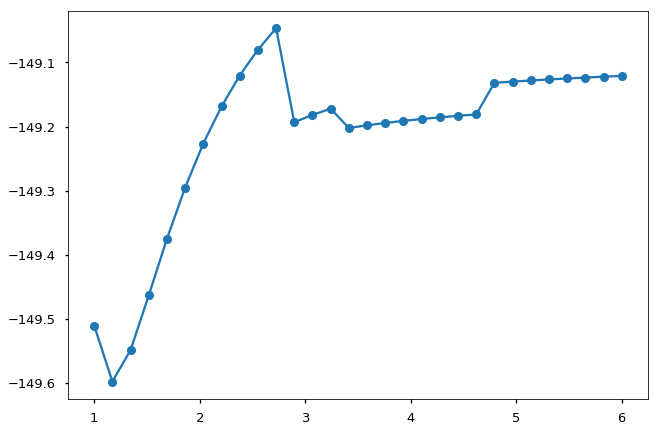

In [7]:
plt.plot(rs, es, 'o-')

1.00000 2.00000 3.00000 4.00000 5.00000 6.00000 7.00000 8.00000 9.00000 10.00000 
Finished


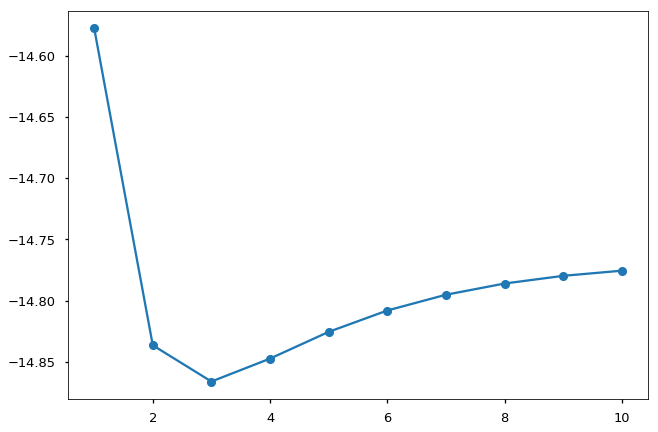

In [8]:
rs = np.linspace(1, 10, 10)
zmat = """
Li
Li 1 %s"""
es, wfns = coord_scan(rs, zmat, model='scf/6-31g*')

plt.plot(rs, es, 'o-')

B$_2$ letting psi4 choose multiplicity.

In [16]:
r = np.linspace(1.25, 4, 20)
zmat = """
B
B 1 %s
"""
Bes, ws = coord_scan(r, zmat, model='scf/6-31g*')

1.25000 1.39474 1.53947 1.68421 1.82895 1.97368 2.11842 2.26316 2.40789 2.55263 2.69737 2.84211 2.98684 3.13158 3.27632 3.42105 3.56579 3.71053 3.85526 4.00000 
Finished


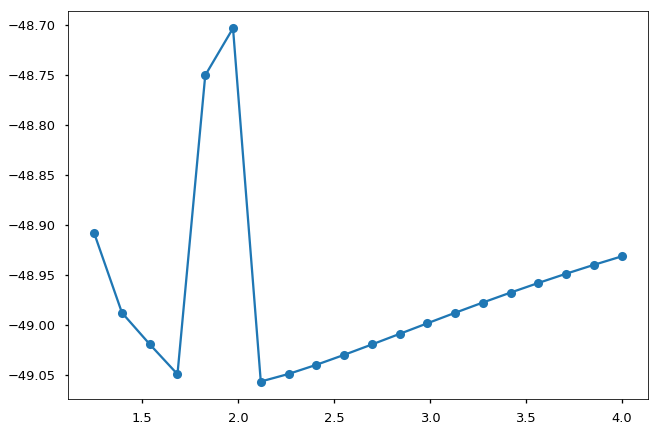

In [17]:
plt.plot(r, Bes, 'o-')
#plt.xlim(10,)

## 2nd row diatomics

In [11]:
#psi4.core.be_quiet()

In [12]:
rs = np.linspace(1, 10, 20)
results = {}
elements = ['1Li', '1B', '3Be', '1C', '1N', '3O', '1F', '1Ne']
model = 'scf/6-31g*'
#model = 'scf/cc-pvdz'
for element in elements:
    mult = element[0]
    center = element[1:]
    tzmat ='\n0 {0:}\n{1:}\n{1:} 1 {2:}'
    es = []
    print('\n', element, end='')
    for r in rs:
        #print(tzmat.format(mult, center, r))
        #break
        mol = psi4.geometry(tzmat.format(mult, center, r))
        es.append(psi4.energy(model, mol=mol))
        print('.', end='')
    results[element] = es

print('\nDone!')    


 1Li....................
 1B....................
 3Be....................
 1C....................
 1N....................
 3O....................
 1F....................
 1Ne....................
Done!


In [13]:
df631gd = pd.DataFrame(results, index=rs)

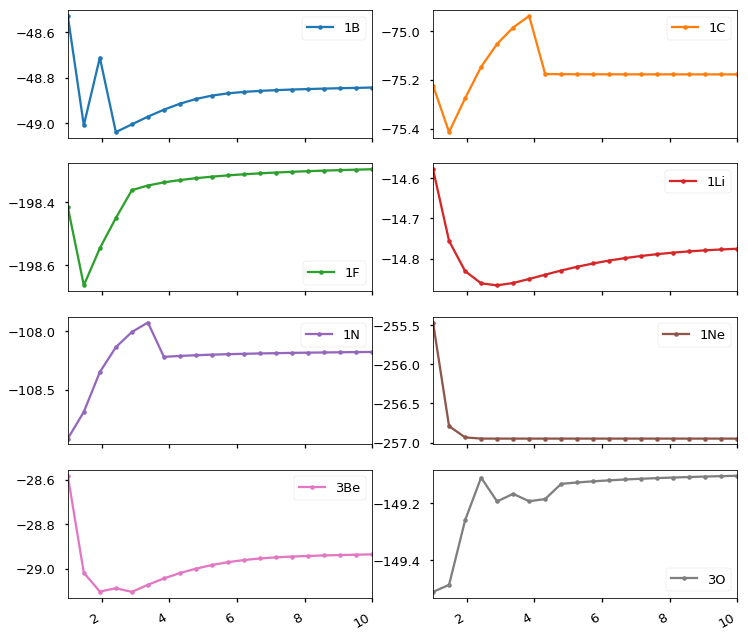

In [14]:
df631gd.plot(subplots=True, layout=(4,2), figsize=(12,12), marker='.');

In [15]:
def calc_energies(diatoms, rs, model='scf/6-31g*'):

    results = {}
    #elements = ['1Li', '1B', '3Be', '1C', '1N', '3O', '1F', '1Ne']
    model = 'scf/6-31g*'
    #model = 'scf/cc-pvdz'
    for diatom in diatoms:
        mult, center1, center2 = diatom.split('-')
        tzmat ='\n0 {0:}\n{1:}\n{2:} 1 {3:}'
        es = []
        print('\n', center1 + '-' + center2, end='')
        for r in rs:
            #print(tzmat.format(mult, center, r))
            #break
            mol = psi4.geometry(tzmat.format(mult, center1, center2, r))
            es.append(psi4.energy(model, mol=mol))
            print('.', end='')
        results[diatom] = es
    print('\nDone!')    
    return results